In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/My Drive/magisterka

/content/drive/My Drive/magisterka


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from enum import Enum, auto
import json

import tensorflow as tf
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
from scripts.data_processing.market_data_processing import prepare_market_data_for_model
from model_training.price_model_training import train_price_prediction_model, ModelType, LossFunction
from model_training.price_model_validation import *
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [4]:
np.random.seed(120)
random.seed(120)

In [5]:
base_path = '/content/drive/My Drive/magisterka/data/market_data'

In [6]:
X, y = prepare_market_data_for_model("sol_merged.csv", base_path, horizon=12*12)

In [7]:
X

,price_over_ema4h,price_over_ema2h,volatility_4h,volatility_wh,volume_z,s_t,log_return_t-1
timestamp,,,,,,,
2025-04-12 00:05:00+00:00,0.002821,0.002743,0.001856,0.002384,-0.044133,0.002384,-0.000291
2025-04-12 00:10:00+00:00,0.002426,0.002255,0.001855,0.002383,-0.284540,0.002383,0.003796
2025-04-12 00:15:00+00:00,0.005982,0.005579,0.001930,0.002385,0.917329,0.002385,-0.006025
2025-04-12 00:20:00+00:00,-0.000058,-0.000425,0.002125,0.002410,-0.058480,0.002410,0.001269
2025-04-12 00:25:00+00:00,0.001162,0.000777,0.002125,0.002411,-0.298311,0.002411,0.003087
...,...,...,...,...,...,...,...
2025-06-06 11:35:00+00:00,0.004034,0.001942,0.000988,0.002334,-0.278739,0.002334,0.000742
2025-06-06 11:40:00+00:00,0.004583,0.002471,0.000925,0.002334,-0.245202,0.002334,0.002372
2025-06-06 11:45:00+00:00,0.006682,0.004461,0.000964,0.002338,-0.180310,0.002338,0.000855


In [8]:
split = TimeSeriesSplit(n_splits=5)

# LSTM - trenowanie

Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - loss: 0.8031 - val_loss: 0.3752 - learning_rate: 0.0010
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.6371 - val_loss: 0.4146 - learning_rate: 0.0010
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.6119 - val_loss: 0.4016 - learning_rate: 0.0010
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.5987 - val_loss: 0.3947 - learning_rate: 5.0000e-04
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.6022 - val_loss: 0.3905 - learning_rate: 5.0000e-04
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.5942 - val_loss: 0.3904 - learning_rate: 2.5000e-04
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.6070 - val_loss: 0.3908 - learning_rate: 2.5000e-04
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.5935 - val_loss: 0.3895 - learning_rate: 1.2500e-04
Epoch 9/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.5953 - val_loss: 0.3891 - learning_rat

/content/drive/My Drive/magisterka/model_training/model_training_plots.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


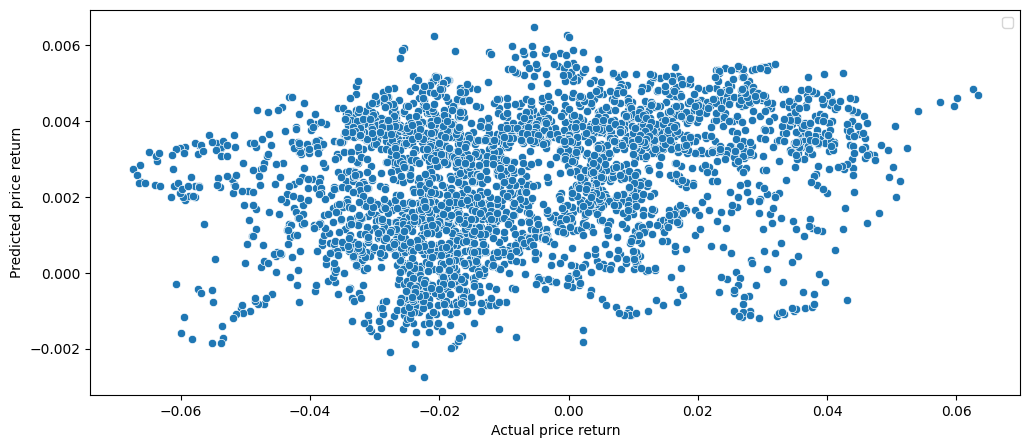

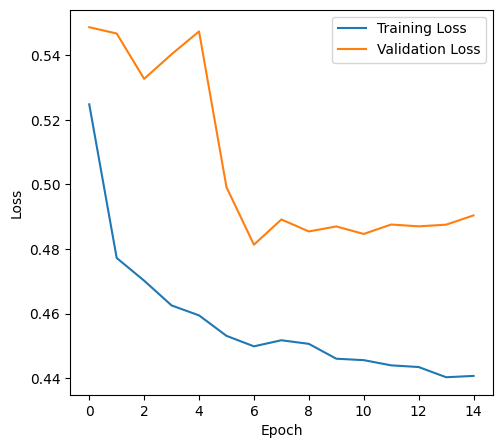

=== Cross-validation (validation folds) ===
mean CV MSE: 0.0005947329336777329
mean CV MAE: 0.01935384050011635
mean CV DA: 0.5166344294003868
mean CV SR: 0.05783782452049515
mean CV R^2: -0.1274939775466919
mean CV Pearson correlation: -0.011940236203372478


/content/drive/My Drive/magisterka/model_training/model_training_plots.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


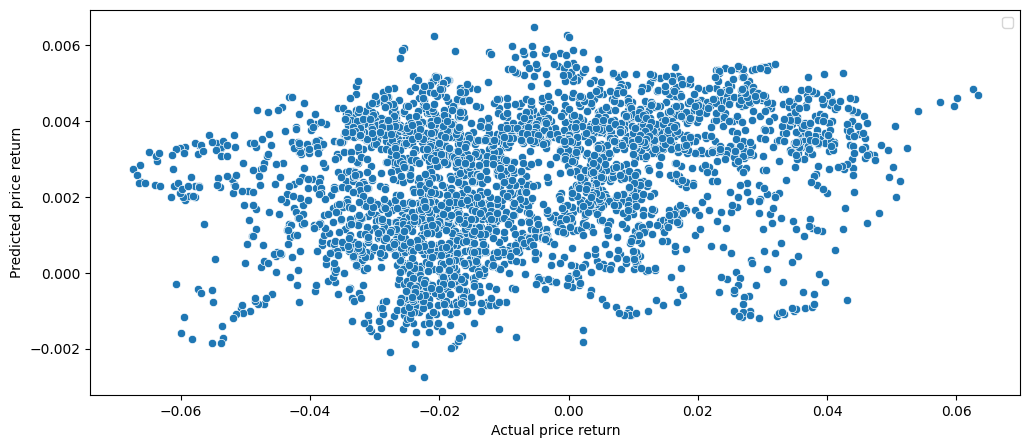

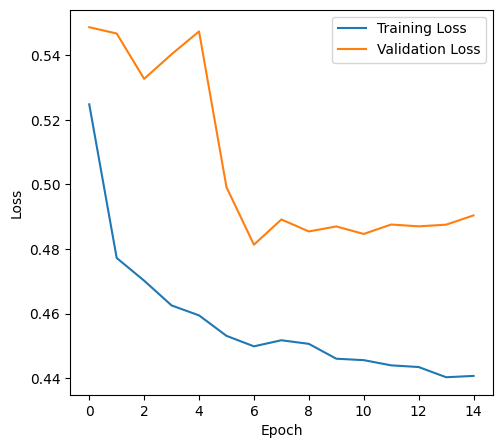

successfully saved training's output to lstm_sol_scores_1_1.json


In [ ]:
lstm_1_scores, lstm_1_history = train_price_prediction_model(X, y, ModelType.LSTM, split, "lstm_sol_scores_1_1.json", dropout=0.5, num_neurons=32, batch_size=128, seq_length=64, learning_rate=0.001, epochs=100, loss_funtion=LossFunction.HUBER)

Epoch 1/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.8364 - val_loss: 0.4353 - learning_rate: 0.0010
Epoch 2/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.6645 - val_loss: 0.4010 - learning_rate: 0.0010
Epoch 3/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.6366 - val_loss: 0.4025 - learning_rate: 0.0010
Epoch 4/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.6355 - val_loss: 0.4123 - learning_rate: 0.0010
Epoch 5/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.6369 - val_loss: 0.4031 - learning_rate: 5.0000e-04
Epoch 6/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.6256 - val_loss: 0.4024 - learning_rate: 5.0000e-04
Epoch 7/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.6084 - val_loss: 0.4000 - learning_rate: 2.5000e-04
Epoch 8/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.6104 - val_loss: 0.3968 - learning_rate: 2.5000e-04
Epoch 9/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.6094 - val_loss: 0.3956 - learning_rate: 2

/content/drive/My Drive/magisterka/model_training/model_training_plots.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


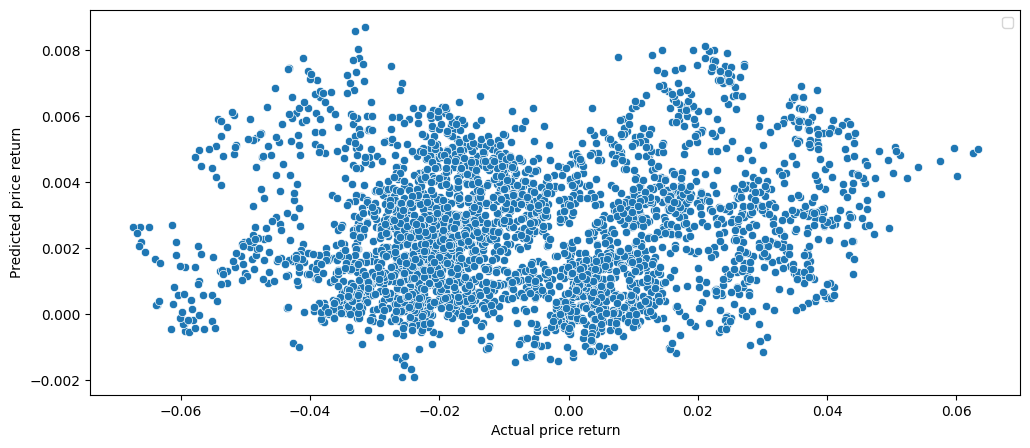

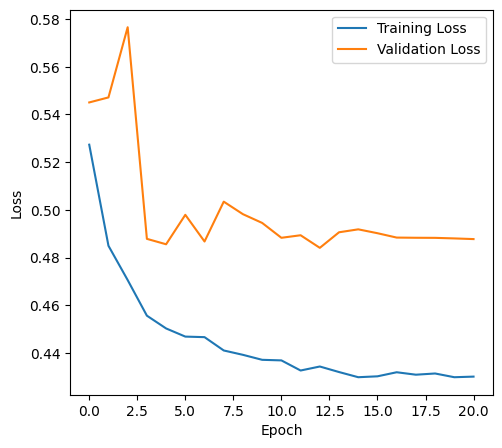

=== Cross-validation (validation folds) ===
mean CV MSE: 0.0006114465068094432
mean CV MAE: 0.019632121548056602
mean CV DA: 0.493036750483559
mean CV SR: -0.0008994797711242508
mean CV R^2: -0.15576672554016113
mean CV Pearson correlation: 0.014023810625076294


/content/drive/My Drive/magisterka/model_training/model_training_plots.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


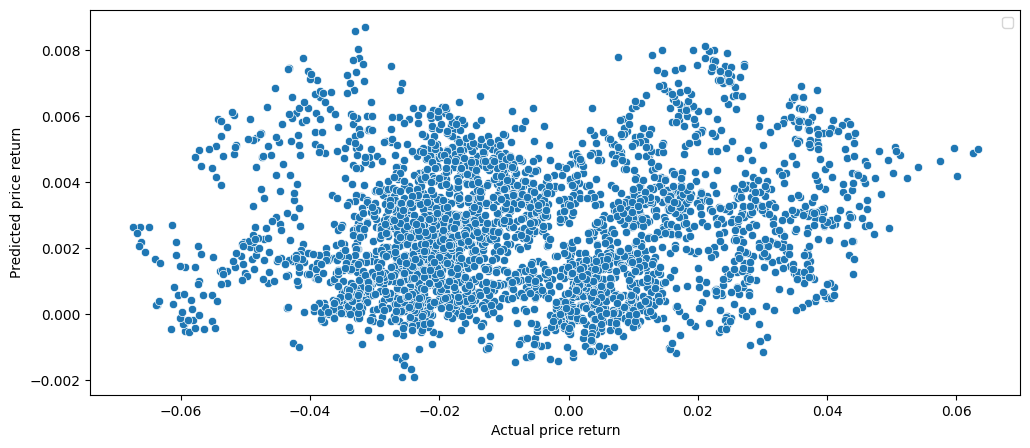

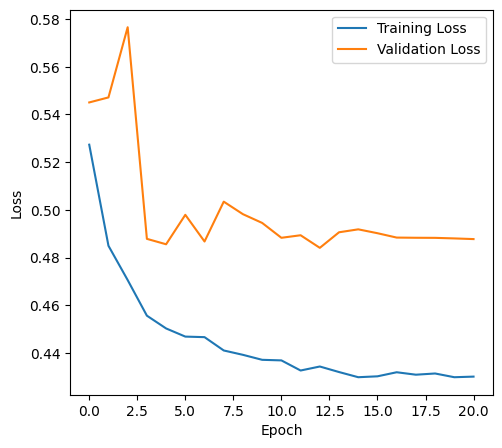

successfully saved training's output to lstm_sol_scores_2_1.json


In [ ]:
lstm_2_scores, lstm_2_history = train_price_prediction_model(X, y, ModelType.LSTM, split, "lstm_sol_scores_2_1.json", dropout=0.5, num_neurons=32, num_layers=1, batch_size=64, seq_length=64, learning_rate=0.001, epochs=100, loss_funtion=LossFunction.HUBER)

Epoch 1/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.8963 - val_loss: 0.4244 - learning_rate: 0.0020
Epoch 2/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.7090 - val_loss: 0.4513 - learning_rate: 0.0020
Epoch 3/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.6862 - val_loss: 0.4111 - learning_rate: 0.0020
Epoch 4/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.6517 - val_loss: 0.4112 - learning_rate: 0.0020
Epoch 5/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.6457 - val_loss: 0.3903 - learning_rate: 0.0020
Epoch 6/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.6264 - val_loss: 0.4012 - learning_rate: 0.0020
Epoch 7/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.6260 - val_loss: 0.3954 - learning_rate: 0.0020
Epoch 8/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.6073 - val_loss: 0.3790 - learning_rate: 0.0010
Epoch 9/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.5971 - val_loss: 0.3836 - learning_rate: 0.0010
Epoch 10/1

/content/drive/My Drive/magisterka/model_training/model_training_plots.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


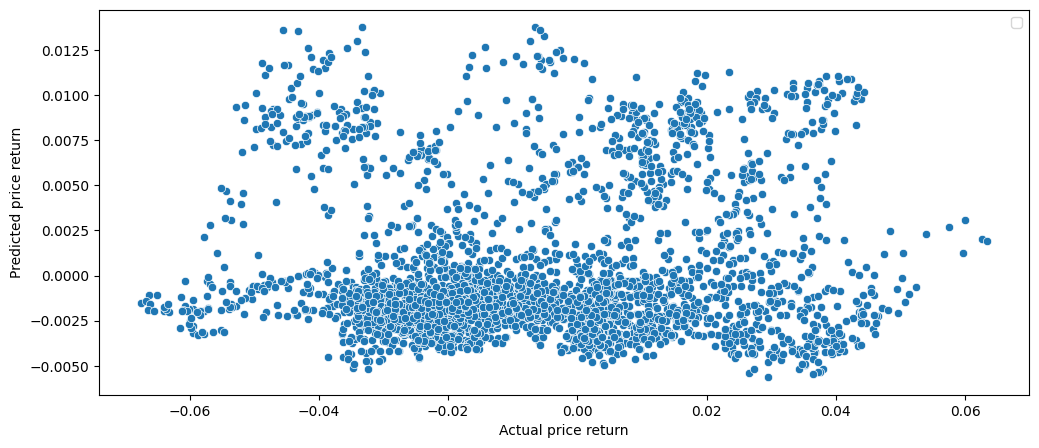

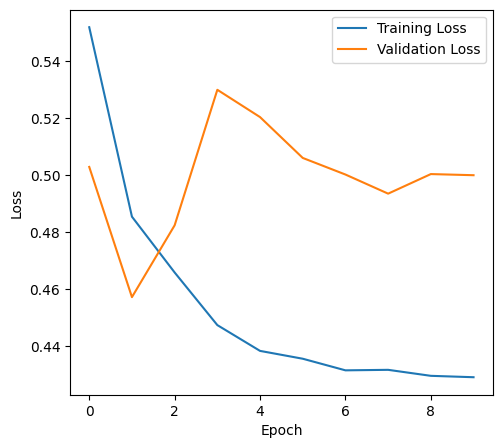

=== Cross-validation (validation folds) ===
mean CV MSE: 0.0005851587047800422
mean CV MAE: 0.019178908318281174
mean CV DA: 0.5346228239845261
mean CV SR: 0.053883900621244075
mean CV R^2: -0.11445014476776123
mean CV Pearson correlation: -0.08124776929616928


/content/drive/My Drive/magisterka/model_training/model_training_plots.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


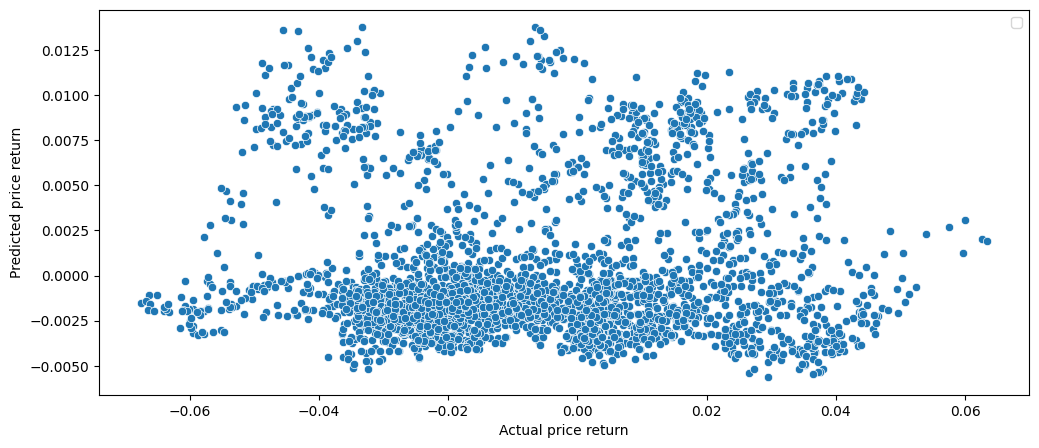

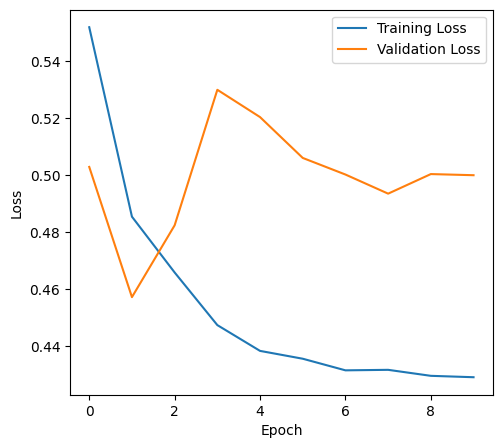

successfully saved training's output to lstm_sol_scores_3_1.json


In [ ]:
lstm_3_scores, lstm_3_history = train_price_prediction_model(X, y, ModelType.LSTM, split, "lstm_sol_scores_3_1.json", dropout=0.7, num_neurons=48, num_layers=1, batch_size=64, seq_length=64, learning_rate=0.002, epochs=100, loss_funtion=LossFunction.HUBER)

# GRU - trenowanie

Epoch 1/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 0.7157 - val_loss: 0.3726 - learning_rate: 0.0010
Epoch 2/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.6496 - val_loss: 0.3735 - learning_rate: 0.0010
Epoch 3/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.6374 - val_loss: 0.3706 - learning_rate: 0.0010
Epoch 4/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.6425 - val_loss: 0.3713 - learning_rate: 0.0010
Epoch 5/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.6155 - val_loss: 0.3705 - learning_rate: 0.0010
Epoch 6/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.6097 - val_loss: 0.3773 - learning_rate: 5.0000e-04
Epoch 7/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.6198 - val_loss: 0.3887 - learning_rate: 5.0000e-04
Epoch 8/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.6286 - val_loss: 0.3795 - learning_rate: 2.5000e-04
Epoch 9/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.6086 - val_loss: 0.3721 - learning_rate: 2.500

/content/drive/My Drive/magisterka/model_training/model_training_plots.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


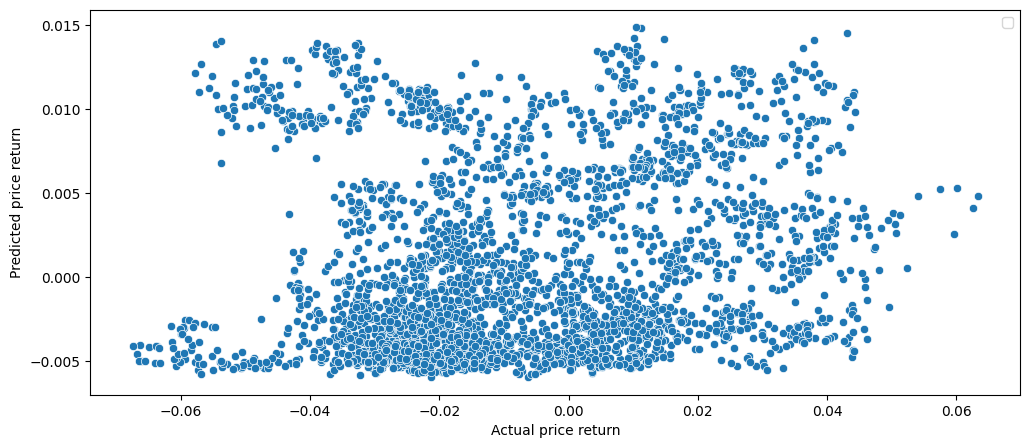

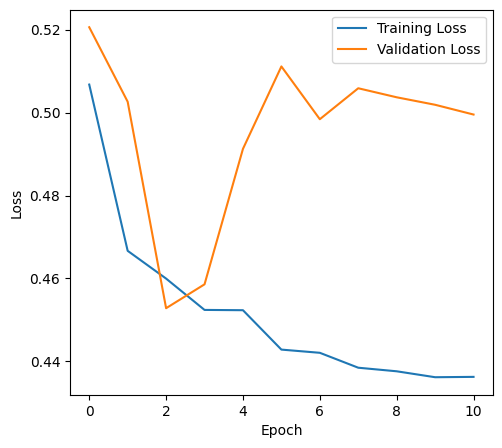

=== Cross-validation (validation folds) ===
mean CV MSE: 0.0005735211307182908
mean CV MAE: 0.018984362483024597
mean CV DA: 0.5073500967117989
mean CV SR: 0.031739432586108965
mean CV R^2: -0.07734193801879882
mean CV Pearson correlation: 0.09009288996458054


/content/drive/My Drive/magisterka/model_training/model_training_plots.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


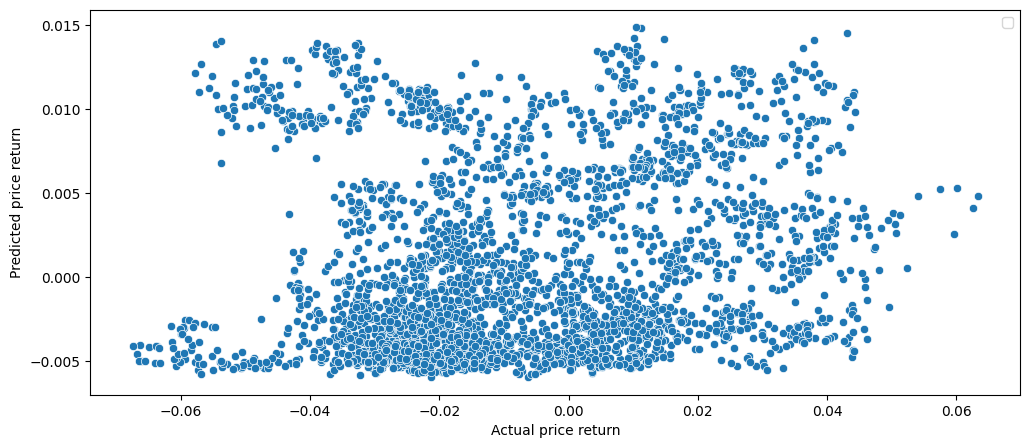

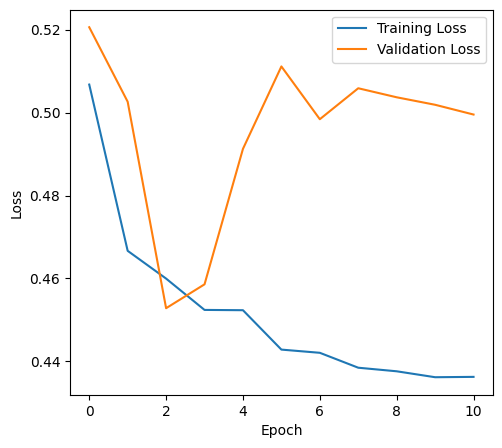

successfully saved training's output to gru_sol_scores_1_1.json


In [ ]:
gru_1_scores, gru_1_history = train_price_prediction_model(X, y, ModelType.GRU, split, "gru_sol_scores_1_1.json", dropout=0.7, num_neurons=32, batch_size=64, seq_length=64, learning_rate=0.001, epochs=100, loss_funtion=LossFunction.HUBER)

Epoch 1/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.8574 - val_loss: 0.4026 - learning_rate: 0.0010
Epoch 2/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.6779 - val_loss: 0.4011 - learning_rate: 0.0010
Epoch 3/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.6661 - val_loss: 0.4027 - learning_rate: 0.0010
Epoch 4/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.6560 - val_loss: 0.3996 - learning_rate: 0.0010
Epoch 5/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.6601 - val_loss: 0.4015 - learning_rate: 0.0010
Epoch 6/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.6575 - val_loss: 0.4025 - learning_rate: 0.0010
Epoch 7/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.6329 - val_loss: 0.4041 - learning_rate: 5.0000e-04
Epoch 8/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.6255 - val_loss: 0.4019 - learning_rate: 5.0000e-04
Epoch 9/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.6211 - val_loss: 0.4029 - learning_rate: 2.5000e-0

/content/drive/My Drive/magisterka/model_training/model_training_plots.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


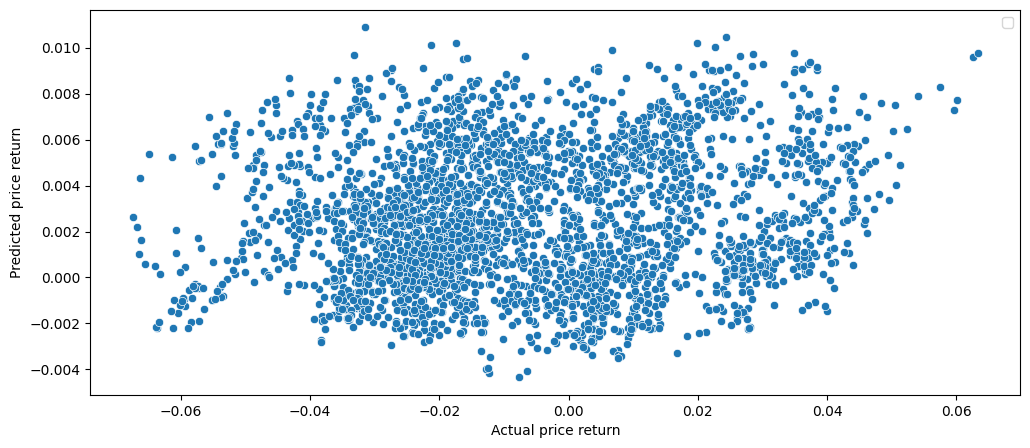

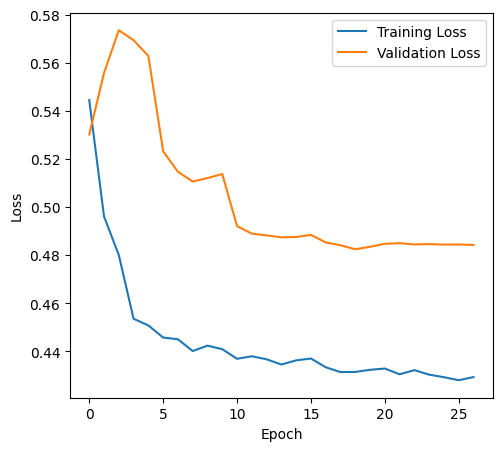

=== Cross-validation (validation folds) ===
mean CV MSE: 0.0006234677275642753
mean CV MAE: 0.019794365391135216
mean CV DA: 0.48539651837524184
mean CV SR: -0.022285170684361373
mean CV R^2: -0.17590668201446533
mean CV Pearson correlation: -0.05767469480633736


/content/drive/My Drive/magisterka/model_training/model_training_plots.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


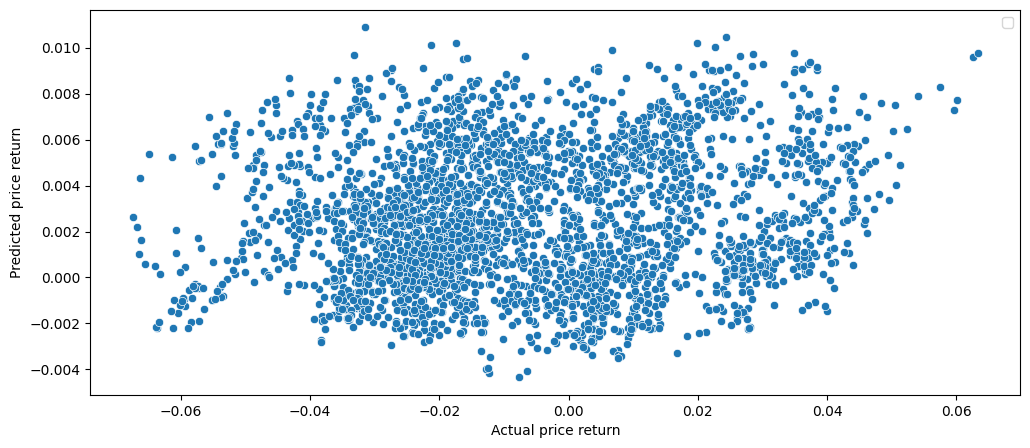

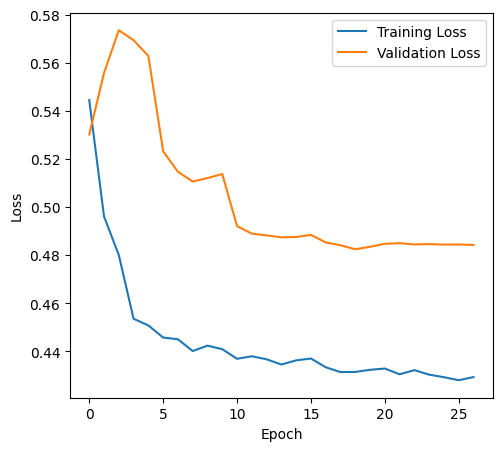

successfully saved training's output to gru_sol_scores_2_1.json


In [9]:
gru_2_scores, gru_2_history = train_price_prediction_model(X, y, ModelType.GRU, split, "gru_sol_scores_2_1.json", dropout=0.2, num_neurons=32, num_layers=1, batch_size=64, seq_length=64, learning_rate=0.001, epochs=100, loss_funtion=LossFunction.HUBER)

Epoch 1/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 1.1278 - val_loss: 0.7717 - learning_rate: 0.0020
Epoch 2/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.8163 - val_loss: 0.5520 - learning_rate: 0.0020
Epoch 3/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.8187 - val_loss: 0.4665 - learning_rate: 0.0020
Epoch 4/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.7736 - val_loss: 0.4600 - learning_rate: 0.0020
Epoch 5/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.7190 - val_loss: 0.4169 - learning_rate: 0.0020
Epoch 6/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.6660 - val_loss: 0.4181 - learning_rate: 0.0020
Epoch 7/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.6700 - val_loss: 0.4102 - learning_rate: 0.0020
Epoch 8/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.6290 - val_loss: 0.4305 - learning_rate: 0.0020
Epoch 9/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.6271 - val_loss: 0.4165 - learning_rate: 0.0020
Epoch 10/1

/content/drive/My Drive/magisterka/model_training/model_training_plots.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


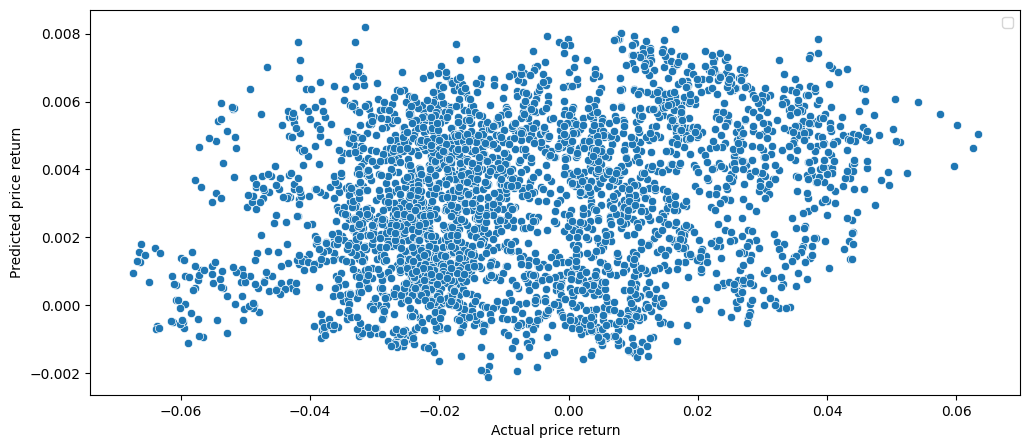

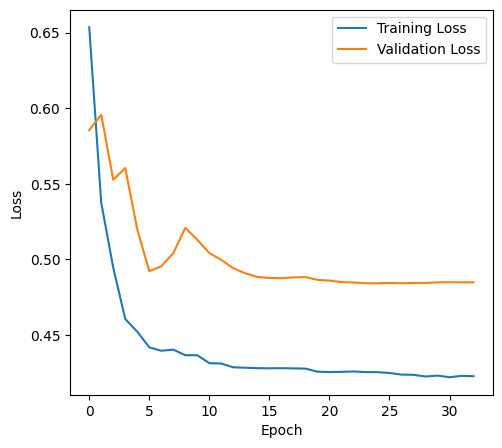

=== Cross-validation (validation folds) ===
mean CV MSE: 0.0006130057154223323
mean CV MAE: 0.01975833810865879
mean CV DA: 0.5331721470019343
mean CV SR: 0.06816158753739766
mean CV R^2: -0.14656438827514648
mean CV Pearson correlation: -0.012526904232800007


/content/drive/My Drive/magisterka/model_training/model_training_plots.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


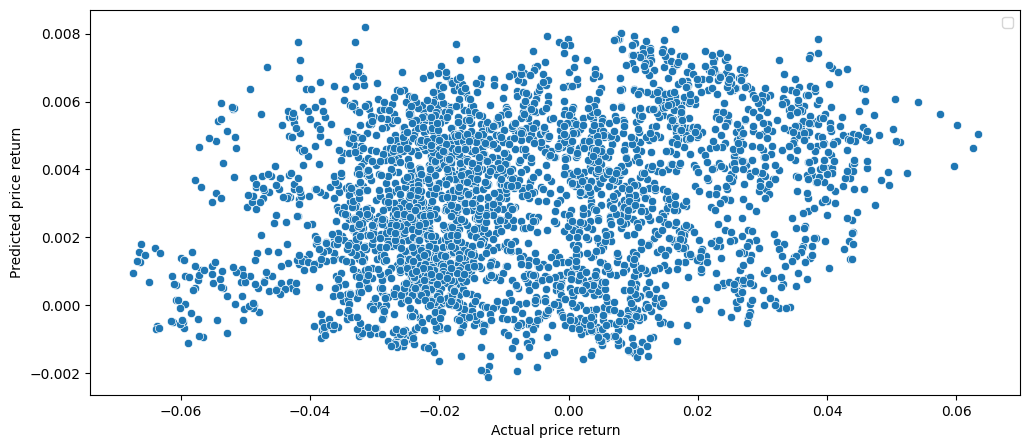

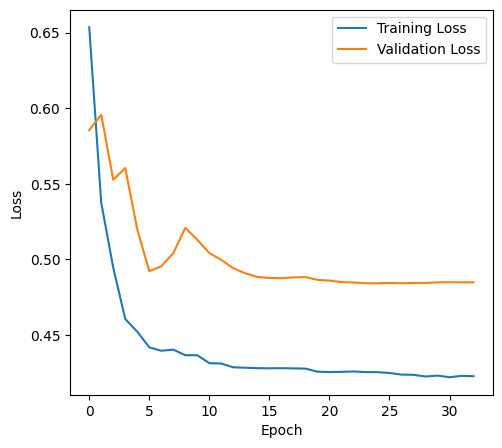

successfully saved training's output to gru_sol_scores_3_1.json


In [10]:
gru_3_scores, gru_3_history = train_price_prediction_model(X, y, ModelType.GRU, split, "gru_sol_scores_3_1.json", dropout=0.2, num_neurons=64, num_layers=1, batch_size=64, seq_length=64, learning_rate=0.002, epochs=100, loss_funtion=LossFunction.HUBER)

# ARIMA - trenowanie

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 5min will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 5min will be used.
  self._init_dates(dates, freq)


[CV fold 1] mse: 0.000627963 | mae: 0.0210293 | da: 0.481 | sr: -0.019


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 5min will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 5min will be used.
  self._init_dates(dates, freq)


[CV fold 2] mse: 0.000345417 | mae: 0.0132975 | da: 0.649 | sr: 0.248


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 5min will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 5min will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[CV fold 3] mse: 0.00082741 | mae: 0.0209115 | da: 0.502 | sr: -0.154


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 5min will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 5min will be used.
  self._init_dates(dates, freq)


[CV fold 4] mse: 0.000940641 | mae: 0.0254672 | da: 0.436 | sr: -0.080


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 5min will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 5min will be used.
  self._init_dates(dates, freq)


[CV fold 5] mse: 0.00283092 | mae: 0.0475592 | da: 0.383 | sr: -0.204


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 5min will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 5min will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[FINAL TEST] mse: 0.000609357 | mae: 0.0201729 | da: 0.633 | sr: 0.328 | r_squared: -0.110 | corr: 0.074


/content/drive/My Drive/magisterka/model_training/model_training_plots.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


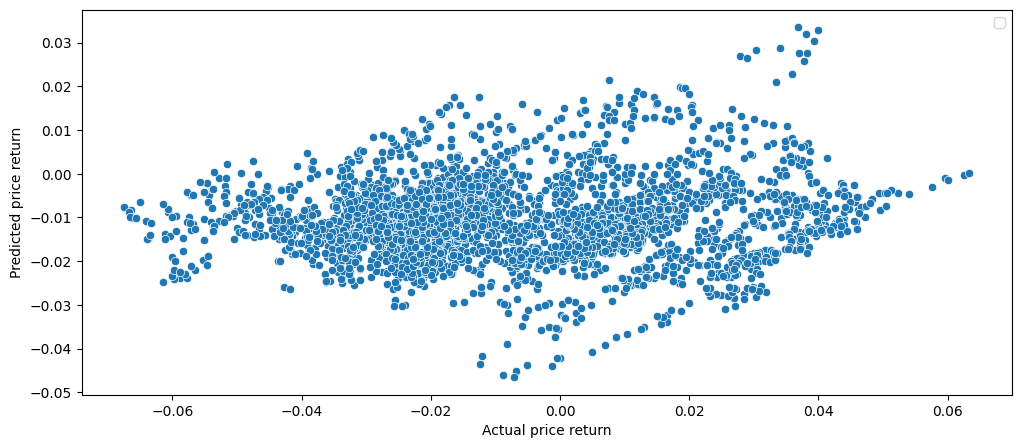

=== Cross-validation (validation folds) ===
mean CV MSE: 0.0011144707225709267
mean CV MAE: 0.025652939543861247
mean CV DA: 0.4900985452839043
mean CV SR: -0.0418029975083825
mean CV R^2: -1.0746378797910854
mean CV Pearson correlation: 0.071401137259795


/content/drive/My Drive/magisterka/model_training/model_training_plots.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


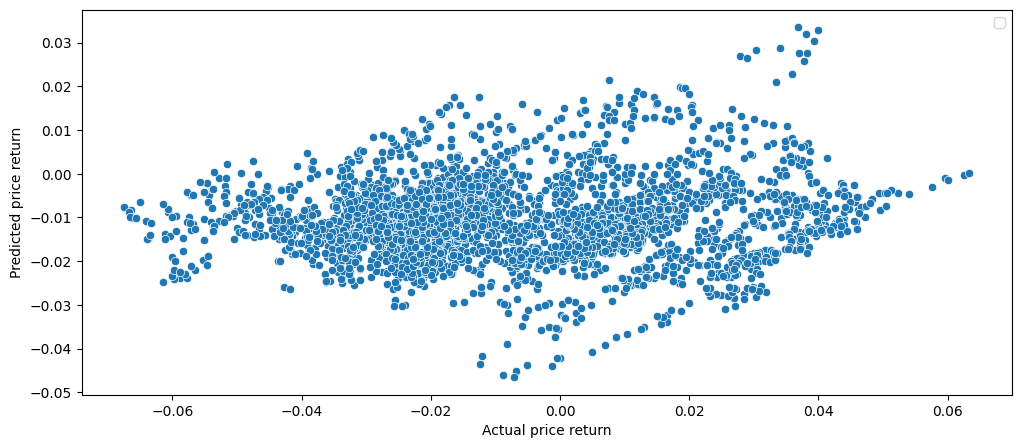

successfully saved training's output to arima_sol_scores_1_1.json


In [ ]:
arima_scores, arima_history = train_price_prediction_model(X, y, ModelType.ARIMA, split, "arima_sol_scores_1_1.json", epochs=100)